<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/CNN_Layer_Visualization_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Access
- *Download the notebook*
- *Save a copy in your drive*
- Send Email : faisal.cse16.kuet@gmail.com

## Convolutional Neural Network: CNN
- image classification
- image segmentation
- object detection

## Import library
- os: read and writes files in directory
- numpy: numerical calculation
- matplotlib: data visualization

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

## Deep learning libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Dataset Loading

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [ ]:
zip_dir_base

'/root/.keras/datasets'

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory training cat 
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory training dog 
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory validation cat 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory validation dog 

In [ ]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

## Data preprocessing
- resize
- scaling

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  
validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [ ]:
IMG_SHAPE=150
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visulize some images

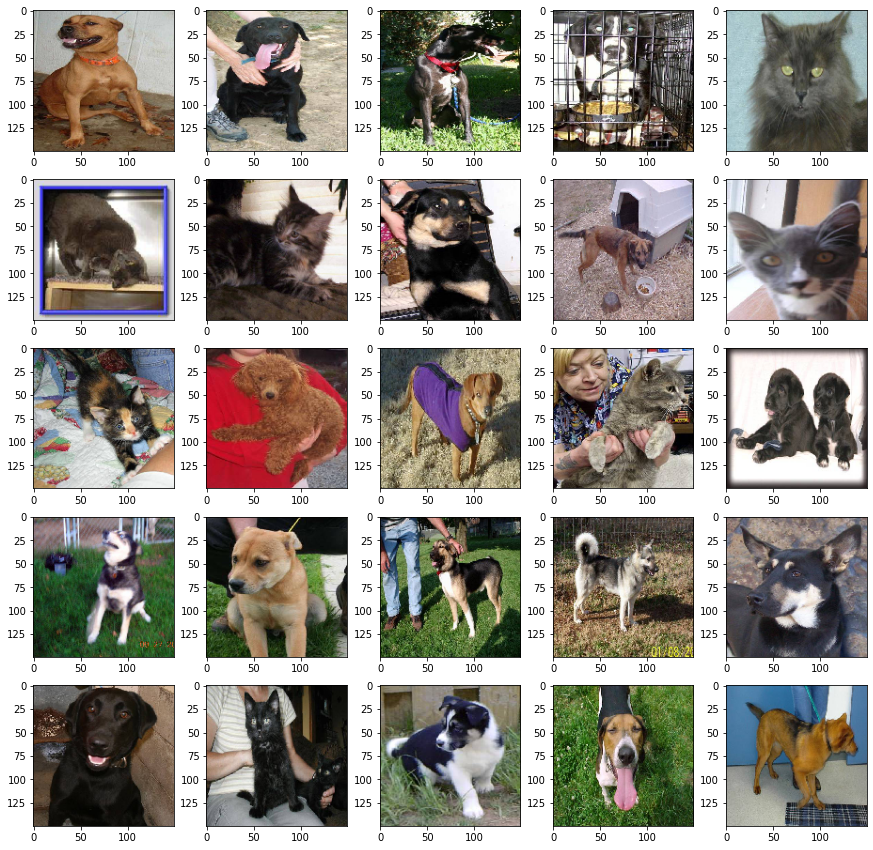

In [ ]:
x,y=train_data_gen.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
  fig.add_subplot(rows,cols,i+1)
  image=x[i]
  plt.imshow(image)
plt.show()

In [ ]:
print('x shape: ',x.shape)
print('y shape: ',y.shape)
print('First image: ',x[0].shape)

x shape:  (32, 150, 150, 3)
y shape:  (32,)
First image:  (150, 150, 3)


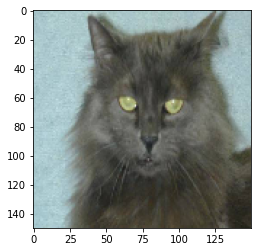

In [ ]:
plt.imshow(x[4])

## Define CNN Architecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.layers

## Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Fit the model

In [ ]:
EPOCHS = 10
BATCH_SIZE=32
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=10,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=10
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 0.9111 - accuracy: 0.5103 - val_loss: 0.7473 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.6933 - accuracy: 0.4939 - val_loss: 0.6941 - val_accuracy: 0.4938
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 0.6915 - accuracy: 0.5638 - val_loss: 0.7115 - val_accuracy: 0.1781
Epoch 4/10
10/10 [==============================] - 21s 2s/step - loss: 0.6878 - accuracy: 0.5461 - val_loss: 0.8275 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.6815 - accuracy: 0.5157 - val_loss: 0.7068 - val_accuracy: 0.3500
Epoch 6/10
10/10 [==============================] - 21s 2s/step - loss: 0.6880 - accuracy: 0.5937 - val_loss: 0.7575 - val_accuracy: 0.0688
Epoch 7/10
10/10 [==============================] - 19s 2s/step - loss: 0.6859 - accuracy: 0.5448 - val_loss: 0.5544 - val_accuracy: 0.9969
Epoch 8/10
1

## Layer Visualization

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten', 'dense', 'dense_1']


In [ ]:
model.layers

In [ ]:
from tensorflow.keras.models import Model

## Set Convolutional layers

In [ ]:
conv2d_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

## Select test image
- from URL 
- from dataset

Shape:  (576, 1024, 3)
Data type:  uint8


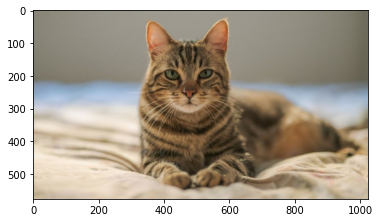

In [ ]:
from skimage import io
download_image=io.imread('https://i.ibb.co/ZBmd3MK/111434468-gettyimages-1143489763.jpg')
print('Shape: ',download_image.shape)
print('Data type: ',download_image.dtype)
plt.imshow(download_image)

## Preprocess image
- resize : 150x150
- create: 4D image

In [ ]:
from skimage.transform import resize
test_image=resize(download_image,(150,150))
print(test_image.shape)
test_image=np.expand_dims(test_image,axis=0)
print(test_image.shape)

(150, 150, 3)
(1, 150, 150, 3)


## Choose from dataset: image data generator : iterator

In [ ]:

dataset_test_image=x

## Seperate the convolution layers to features extraction

In [ ]:
conv2d_features=conv2d_ouput.predict(test_image)
conv2d_1_features=conv2d_1_ouput.predict(test_image)
conv2d_2_features=conv2d_2_ouput.predict(test_image)
conv2d_3_features=conv2d_3_ouput.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)

Conv layer feature output shape:  (1, 148, 148, 32)
Conv_1 layer feature output shape:  (1, 72, 72, 64)
Conv_2 layer feature output shape:  (1, 34, 34, 128)
Conv_3 layer feature output shape:  (1, 15, 15, 128)


## Layers Visualization

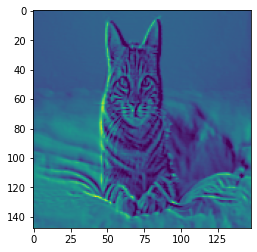

In [ ]:
plt.imshow(conv2d_features[0,:,:,15])

## Layer Convolutional 0: 32

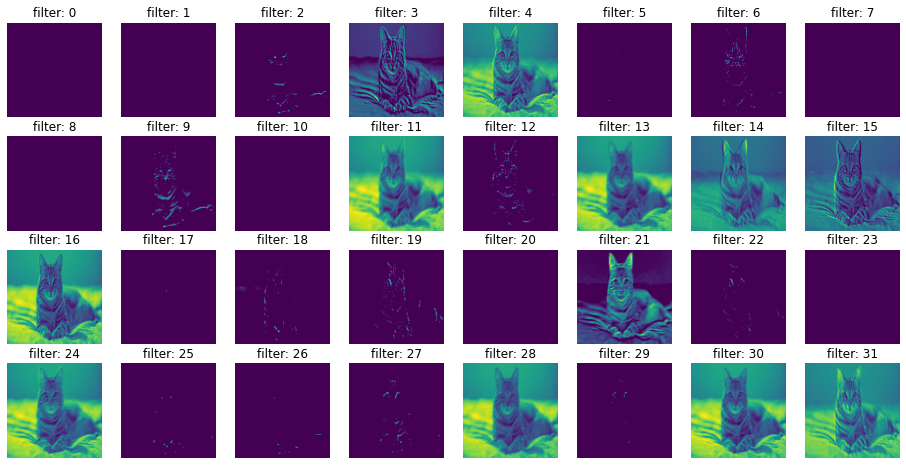

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i])
plt.show()

## Layer Convolutional 1: 64

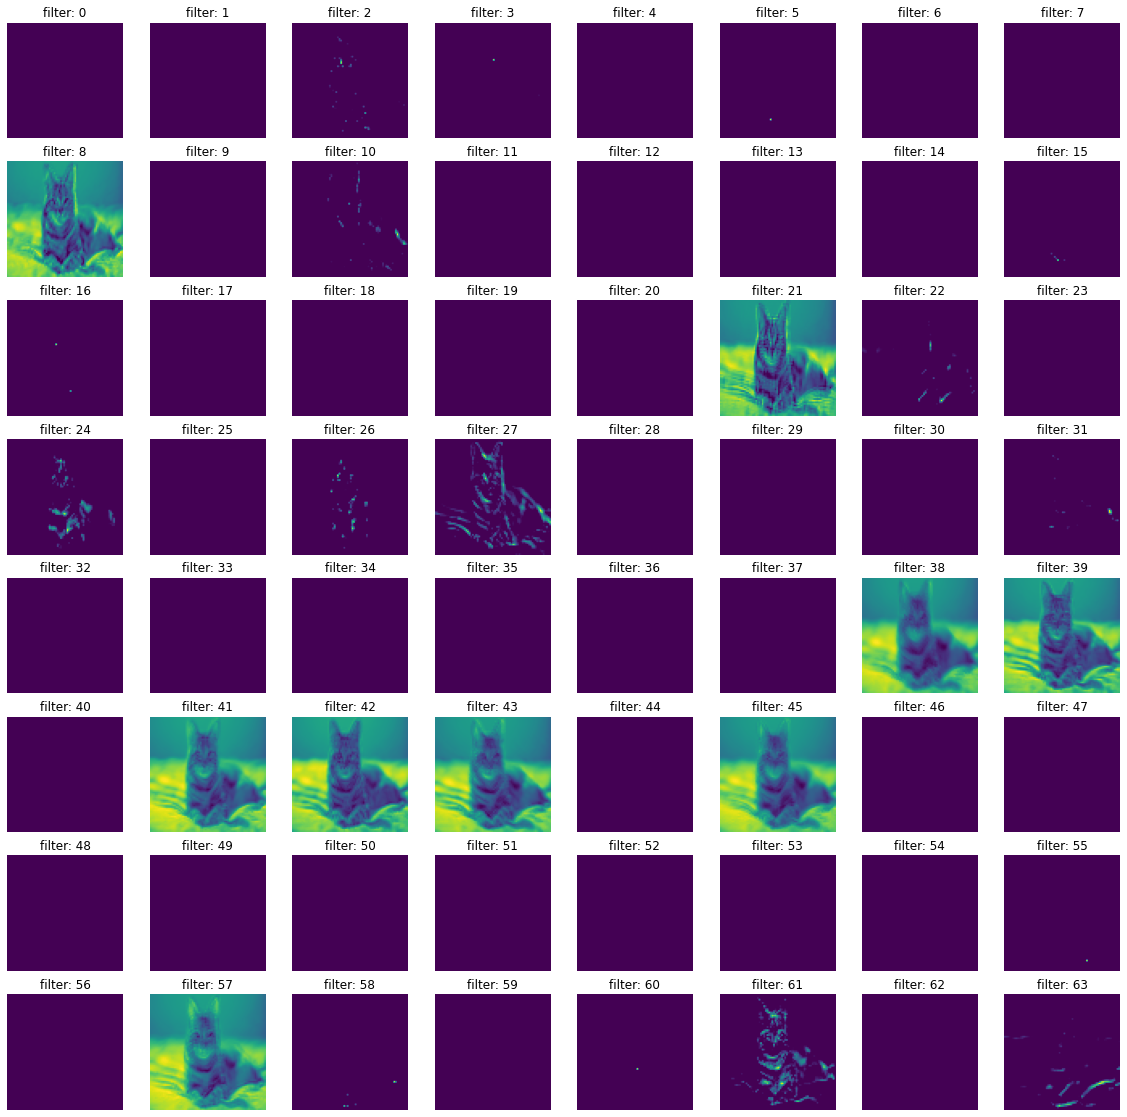

In [ ]:
fig = plt.figure(figsize=(20,20))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i])
plt.show()

## Layer Convolutional 2

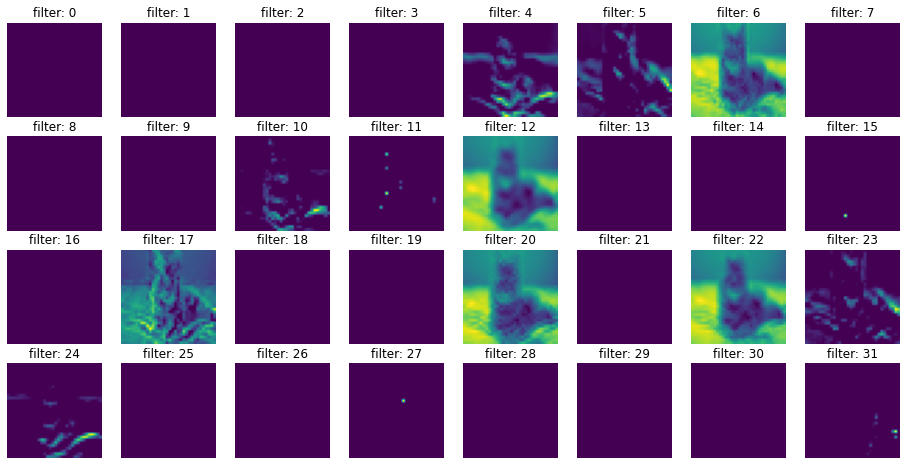

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i])
plt.show()

## Layer Convolutional 3

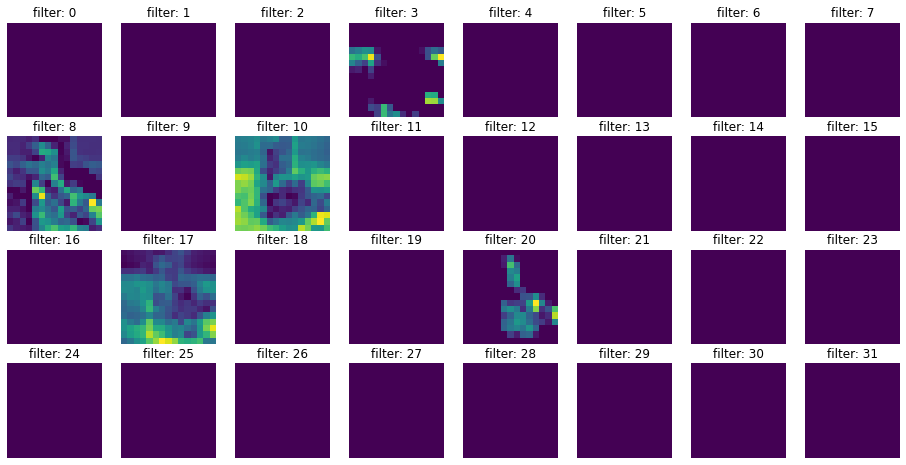

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i])
plt.show()